In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot,plot
import plotly.offline as py


In [4]:
data = pd.read_csv('Churn Modeling.csv')

In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [7]:
data_1 = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [8]:
data_1.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [9]:
data_1['CreditScore_cat'] = ['bad'  if i >= 350 and i<=669 else 'good' if i>=670 and i<=739 else 'very good' for i in data['CreditScore']]
data_1['CreditScore_cat_num'] = [0  if i >= 350 and i<=669 else 1 if i>=670 and i<=739 else 2 for i in data['CreditScore']]
data_1['Exited_str'] = ['Exited' if i ==1 else 'Retained' for i in data['Exited']]
data_1['IsActiveMember_str'] = ['Active'if i ==1 else 'passive' for i in data['IsActiveMember']]
data_1['HasCrCard_str'] =  ['Has CrCard'if i ==1 else 'hasn\'t CrCard' for i in data['HasCrCard']]

In [10]:
data_1

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited CreditScore_cat  \
0             1               1        101348.88       1             bad   
1             0               1        112542.58       0             bad   
2             1               0        113931.57       1             bad   
3             0               0         93826.63       0            good   
4             1               1         79084.10       0       very good   
...         ...             ...              ...     ...             ...   
9995          1               0         96270.64       0       very good   
9996          1               1        101699.77       0             bad   
9997          0               1         42085.58       1            good   
9998          1               0         92888.52       1       very good   
9999          1               0         38190.78       0       very good   

      CreditScore_cat_num Exited_str IsActiveMember_str  HasCrCard_str  
0                       0     Exited             Active     Has CrCard  
1                       0   Retained             Active  hasn't CrCard  
2                       0     Exited            passive     Has CrCard  
3                       1   Retained            passive  hasn't CrCard  
4                       2   Retained             Active     Has CrCard  
...                   ...        ...                ...            ...  
9995                    2   Retained            passive     Has CrCard  
9996                    0   Retained             Active     Has CrCard  
9997                    1     Exited             Active  hasn't CrCard  
9998                    2     Exited            passive     Has CrCard  
9999                    2   Retained            passive     Has CrCard  

[10000 rows x 16 columns]

In [11]:
data_1.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  \
count  10000.00000    10000.000000     10000.000000  10000.000000   
mean       0.70550        0.515100    100090.239881      0.203700   
std        0.45584        0.499797     57510.492818      0.402769   
min        0.00000        0.000000        11.580000      0.000000   
25%        0.00000        0.000000     51002.110000      0.000000   
50%        1.00000        1.000000    100193.915000      0.000000   
75%        1.00000        1.000000    149388.247500      0.000000   
max        1.00000        1.000000    199992.480000      1.000000   

       CreditScore_cat_num  
count         10000.000000  
mean              0.618600  
std               0.782173  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               1.000000  
max               2.000000

In [12]:
data_1.dtypes

CreditScore              int64
Geography               object
Gender                  object
Age                      int64
Tenure                   int64
Balance                float64
NumOfProducts            int64
HasCrCard                int64
IsActiveMember           int64
EstimatedSalary        float64
Exited                   int64
CreditScore_cat         object
CreditScore_cat_num      int64
Exited_str              object
IsActiveMember_str      object
HasCrCard_str           object
dtype: object

In [13]:
data_1.isna().sum()

CreditScore            0
Geography              0
Gender                 0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited                 0
CreditScore_cat        0
CreditScore_cat_num    0
Exited_str             0
IsActiveMember_str     0
HasCrCard_str          0
dtype: int64

In [14]:
data_1.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [15]:
data = dict(
        type = 'choropleth',
        colorscale = 'rainbow',
        locations = data_1['Geography'],
        locationmode = "country names",
        z = data_1['Exited'],
        text = data_1['Geography'],
        colorbar = {'title' : 'Customers'},
      )

layout = dict(title = 'Customer Locations',
              geo = dict(projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

C:\Users\acer_\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning:

Legend does not support 'Retained' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\acer_\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning:

Legend does not support 'Exited' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists



Text(0.5, 1.0, 'has credit card')

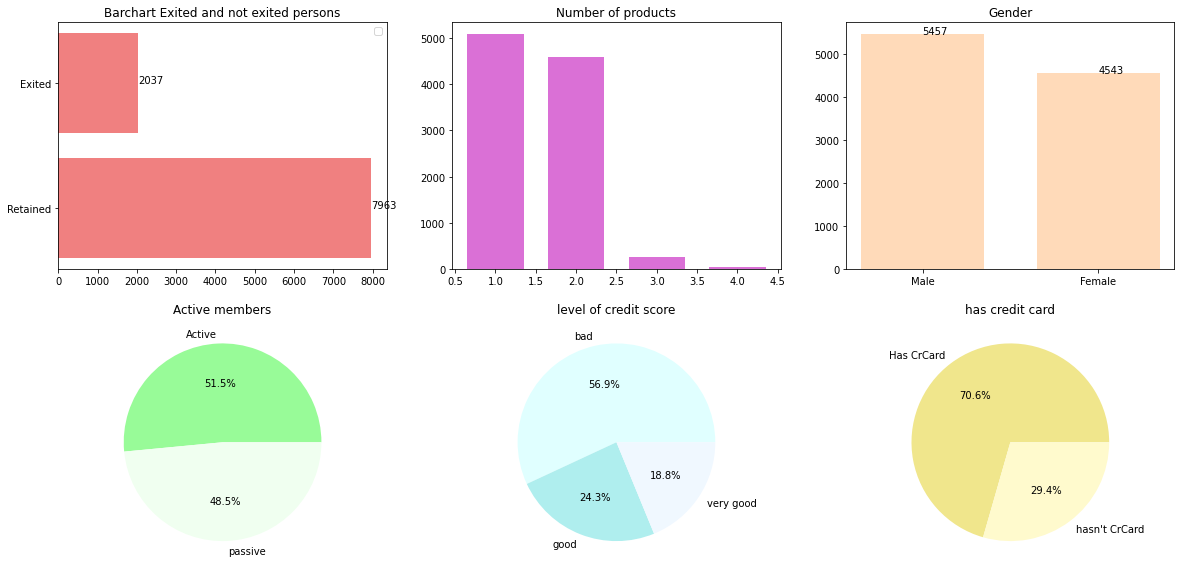

In [16]:
fig, ax = plt.subplots(2,3,figsize=(20, 10))

names = data_1.Exited_str.value_counts().index
values = data_1.Exited.value_counts()

ax[0,0].barh(names, values,color = 'lightcoral');
ax[0,0].set_title('Barchart Exited and not exited persons');
ax[0,0].legend(names,values)
for index, value in enumerate(values):
    ax[0,0].text(value, index,str(value))


    
ax[1,1].pie(data_1.CreditScore_cat.value_counts(), labels = data_1.CreditScore_cat.value_counts().index,autopct='%1.1f%%', colors = ['lightcyan', 'paleturquoise','aliceblue']);
ax[1,1].set_title('level of credit score')


names_1 = data_1.Gender.value_counts().index
values_1 = data_1.Gender.value_counts()
ax[0,2].bar(names_1, values_1,color = 'peachpuff',width=0.7);
ax[0,2].set_title('Gender')
for index,data in enumerate(values_1):
    ax[0,2].text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))



ax[1,0].pie(data_1.IsActiveMember_str.value_counts(), labels = data_1.IsActiveMember_str.value_counts().index,autopct='%1.1f%%', colors = ['palegreen', 'honeydew']);
ax[1,0].set_title('Active members')


names_2 = data_1.NumOfProducts.value_counts().index
values_2 = data_1.NumOfProducts.value_counts()
ax[0,1].bar(names_2, values_2,color = 'orchid',width=0.7);
ax[0,1].set_title('Number of products')



ax[1,2].pie(data_1.HasCrCard_str.value_counts(), labels = data_1.HasCrCard_str.value_counts().index,autopct='%1.1f%%', colors = ['khaki', 'lemonchiffon']);
ax[1,2].set_title('has credit card')

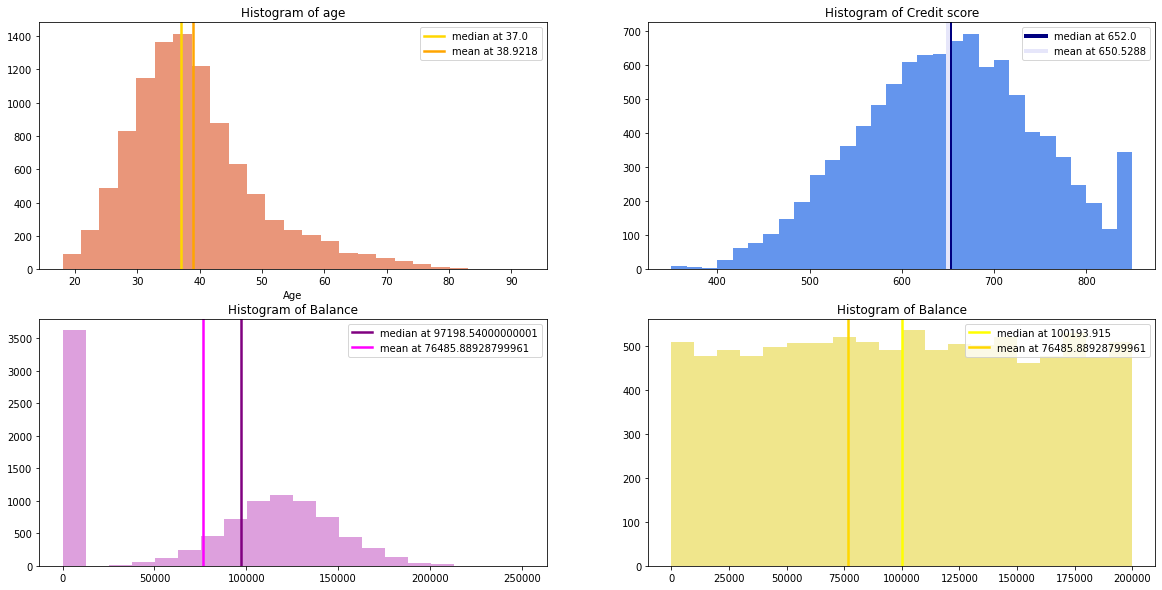

In [17]:
plt.subplots(figsize=(20, 10))
plt.subplot(221)
plt.hist(data_1.Age, bins = 25, color = 'darksalmon')
plt.title('Histogram of age')
plt.xlabel('Age')
measurements = [data_1.Age.median(),data_1.Age.mean()]
names = ["median", "mean"]
colors = ['gold', 'orange']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend();

plt.subplot(222)
plt.hist(data_1.CreditScore, color = 'cornflowerblue', bins = 30);
plt.title('Histogram of Credit score')
measurements = [data_1.CreditScore.median(),data_1.CreditScore.mean()]
names = ["median", "mean"]
colors = ['navy', 'lavender']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linewidth=4, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend();

plt.subplot(223)
plt.hist(data_1.Balance,bins = 20,color = 'plum');
measurements = [data_1.Balance.median(),data_1.Balance.mean()]
plt.title('Histogram of Balance')
names = ["median", "mean"]
colors = ['purple', 'magenta']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend();


plt.subplot(224)
plt.hist(data_1.EstimatedSalary,bins = 20,color = 'khaki');
measurements = [data_1.EstimatedSalary.median(),data_1.Balance.mean()]
plt.title('Histogram of Balance')
names = ["median", "mean"]
colors = ['yellow', 'gold']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend();



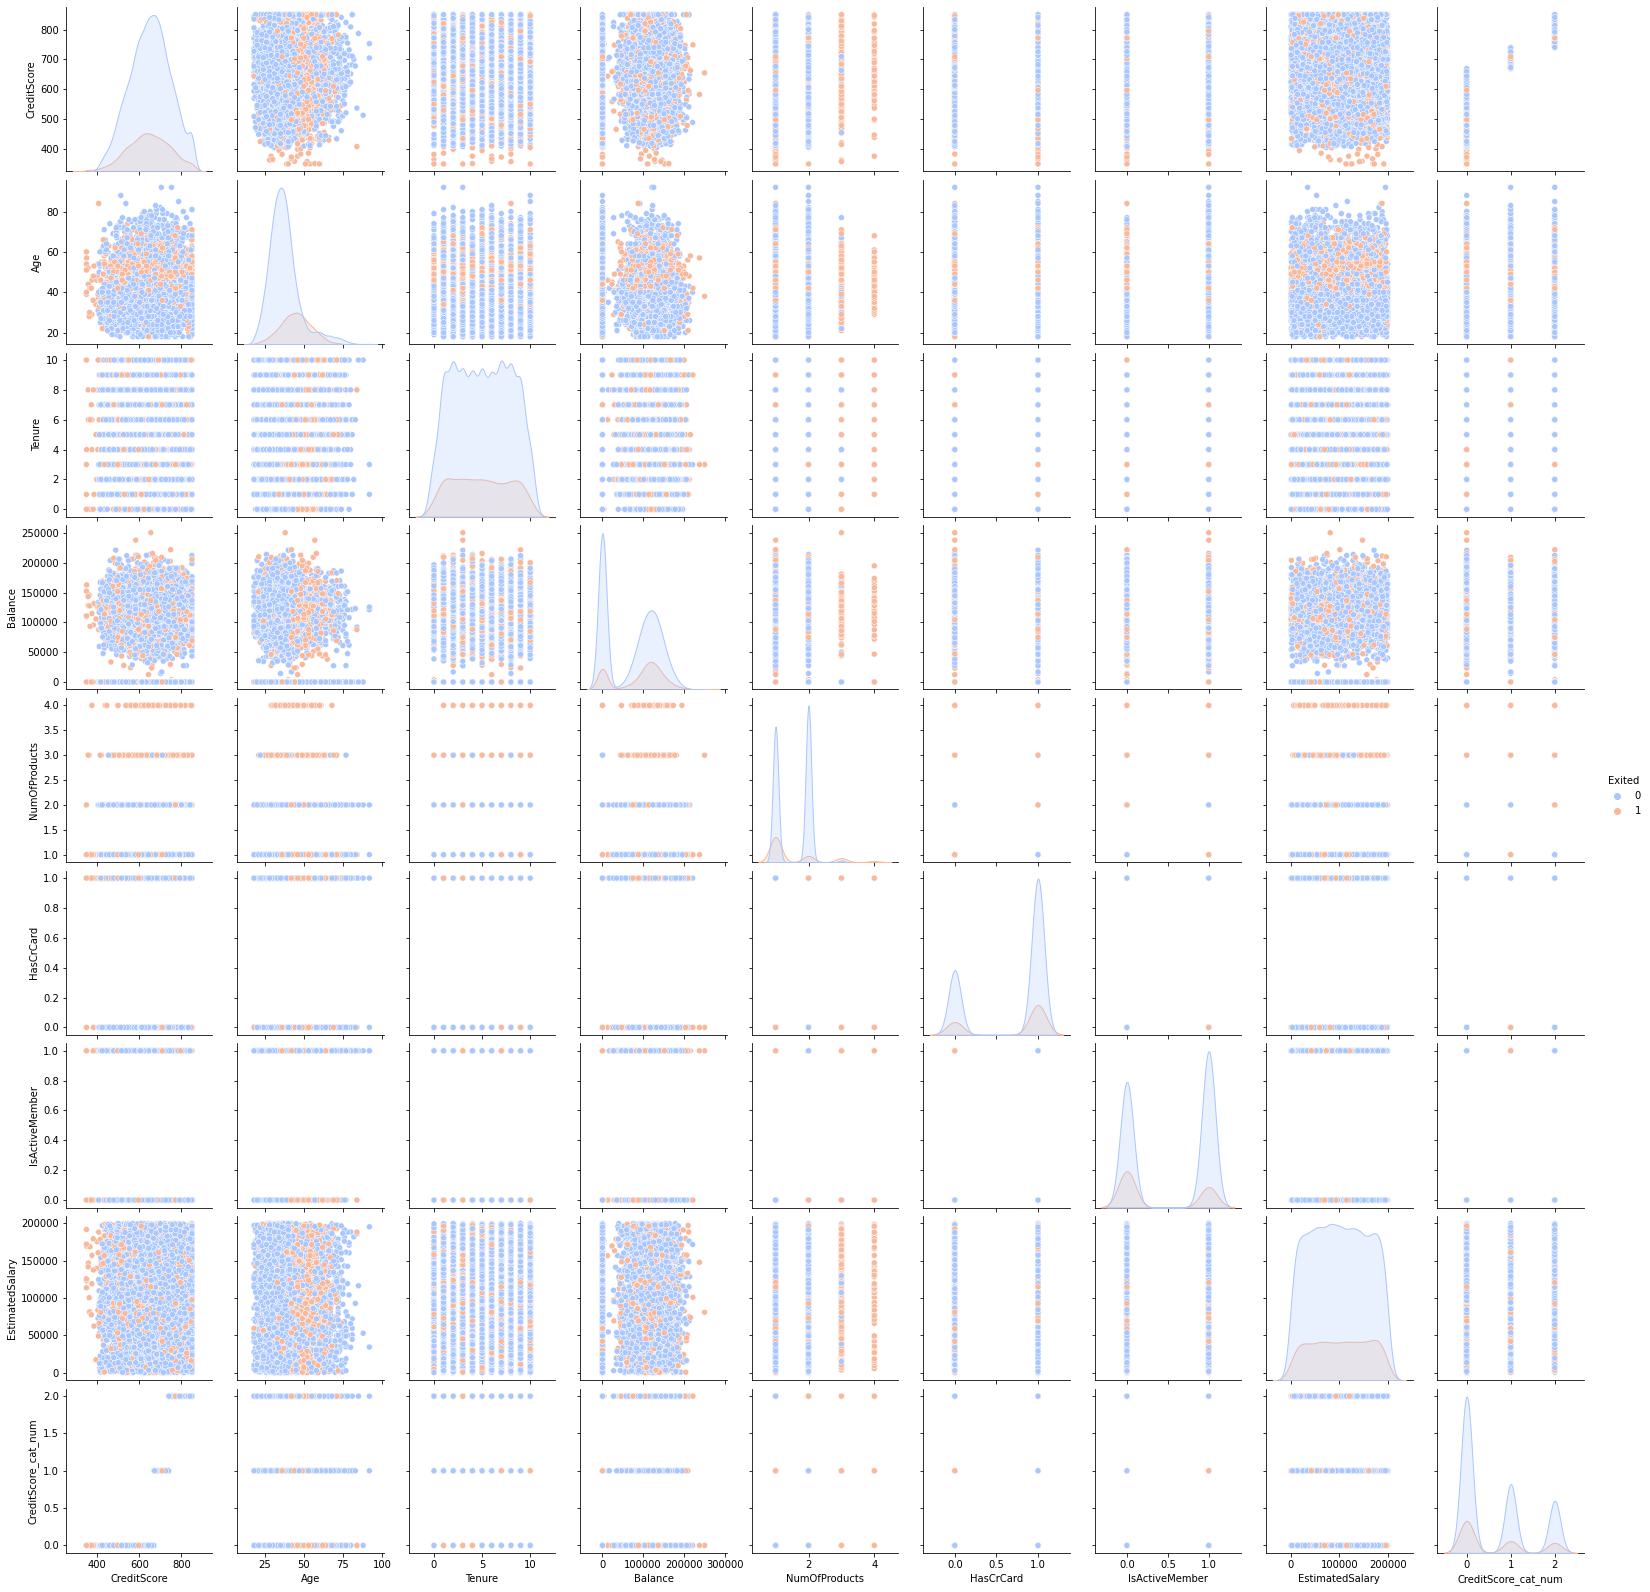

In [18]:
sns.pairplot(data_1, hue="Exited", palette="coolwarm")

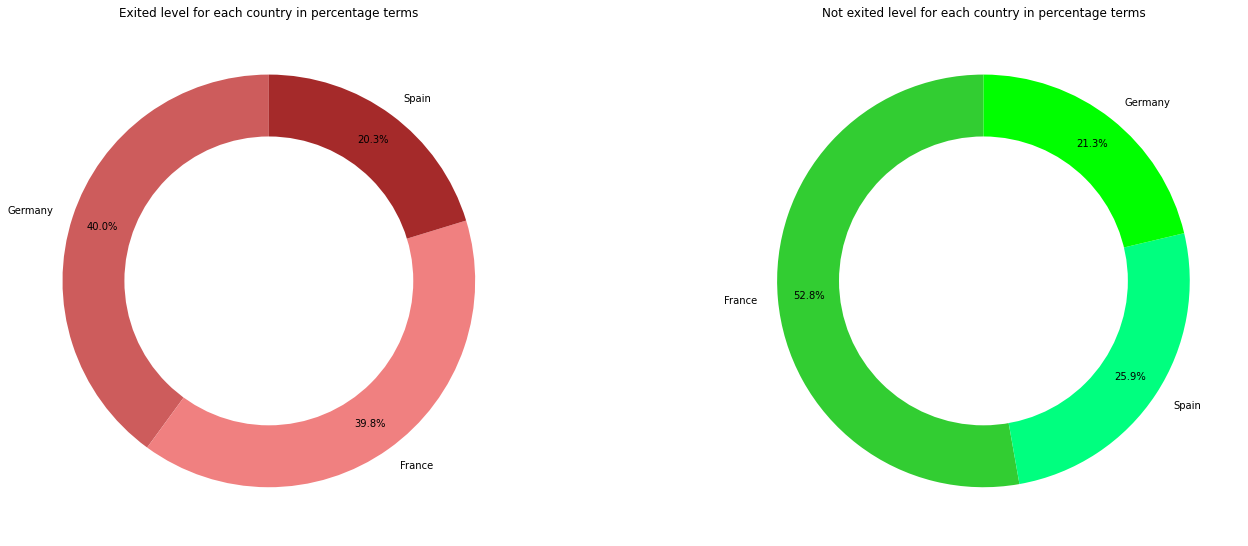

In [21]:
exited_yes = data_1[data_1.Exited==1].Geography
exited_no = data_1[data_1.Exited==0].Geography

plt.subplots(figsize=(20, 15))
plt.subplot(221)
values = exited_yes.value_counts()/sum(exited_yes.value_counts())*100
labels = (exited_yes.value_counts()/sum(exited_yes.value_counts())*100).index
colors = ['indianred','lightcoral','brown']

plt.pie(values, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Exited level for each country in percentage terms')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()

plt.subplot(222)
values_no = exited_no.value_counts()/sum(exited_no.value_counts())*100
labels_no = (exited_no.value_counts()/sum(exited_no.value_counts())*100).index
colors_no = ['limegreen', 'springgreen', 'lime']

plt.pie(values_no, colors = colors_no, labels=labels_no, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Not exited level for each country in percentage terms')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()


In [22]:
exited_persons = data_1[data_1.Exited==1]

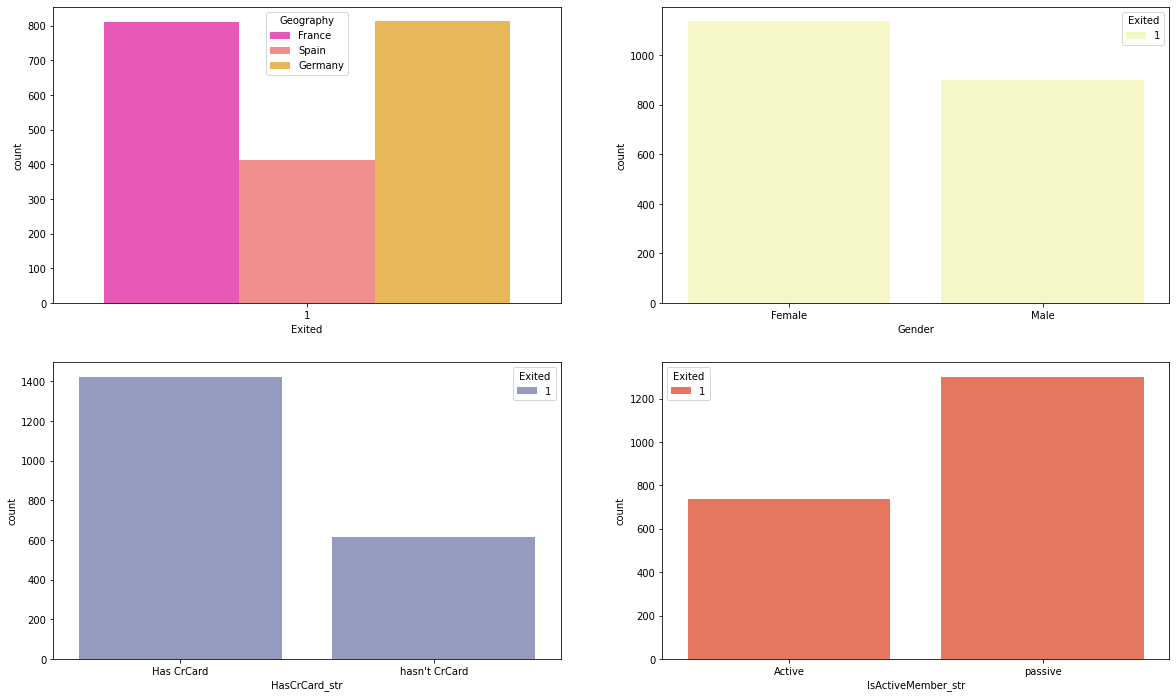

In [26]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Exited', hue='Geography', data=exited_persons, palette="spring",ax=axarr[0][0]);
sns.countplot(x='Gender', hue = 'Exited',data = exited_persons,palette="RdYlGn", ax=axarr[0][1]);
sns.countplot(x='HasCrCard_str', hue = 'Exited',data = exited_persons,palette= "BuPu_r",ax=axarr[1][0]);
sns.countplot(x='IsActiveMember_str', hue = 'Exited',data = exited_persons, palette = "Reds",ax=axarr[1][1]);

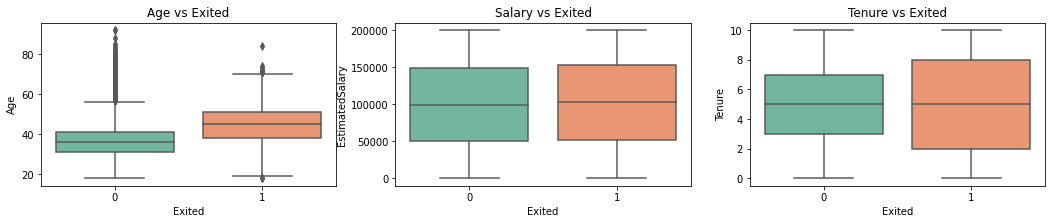

In [27]:
f, axes = plt.subplots(ncols=3, figsize=(18,3))

sns.boxplot(x="Exited", y="Age", data=data_1, ax=axes[0], palette="Set2")
axes[0].set_title('Age vs Exited')

sns.boxplot(x="Exited", y="EstimatedSalary", data=data_1, ax=axes[1], palette="Set2")
axes[1].set_title('Salary vs Exited')

sns.boxplot(x="Exited", y="Tenure", data=data_1, ax=axes[2], palette="Set2")
axes[2].set_title('Tenure vs Exited')

plt.show()

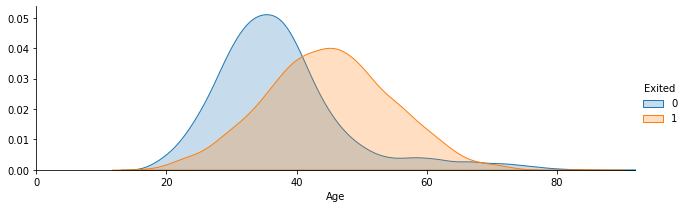

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

In [28]:
facet = sns.FacetGrid(data_1, hue="Exited", aspect=3)
facet.map(sns.kdeplot,"Age", shade = True)
facet.set(xlim = (0, data_1["Age"].max()))
facet.add_legend()

plt.show()
data_1.groupby(data_1["Exited"])["Age"].mean()


In [29]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title(f"KDE Plot for {feature}")
    ax0 = sns.kdeplot(data_1[data_1['Exited'] == 0][feature].dropna(), color= 'dodgerblue', label= 'Exited - 0')
    ax1 = sns.kdeplot(data_1[data_1['Exited'] == 1][feature].dropna(), color= 'orange', label= 'Exited - 1')

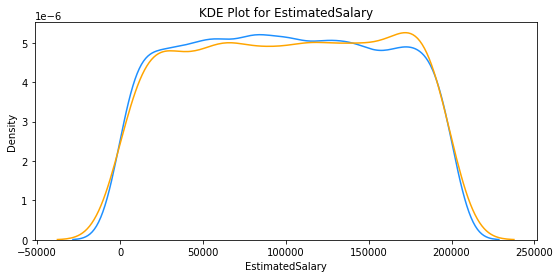

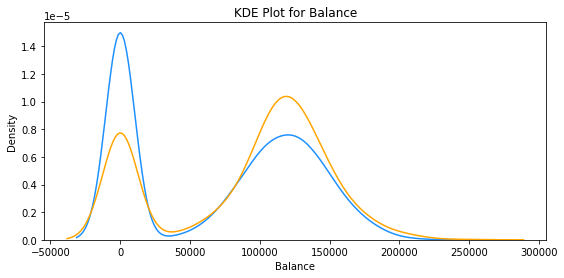

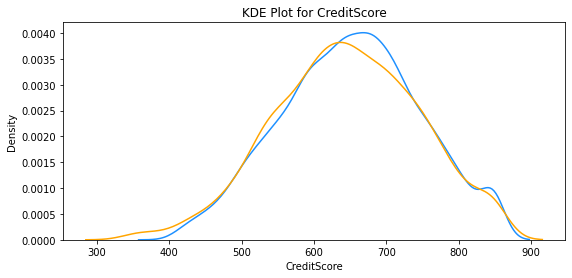

In [30]:
kdeplot('EstimatedSalary')
kdeplot('Balance')
kdeplot('CreditScore')

C:\Users\acer_\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



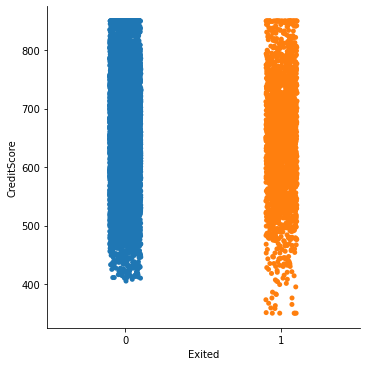

In [31]:
sns.catplot("Exited", "CreditScore", data = data_1)

C:\Users\acer_\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



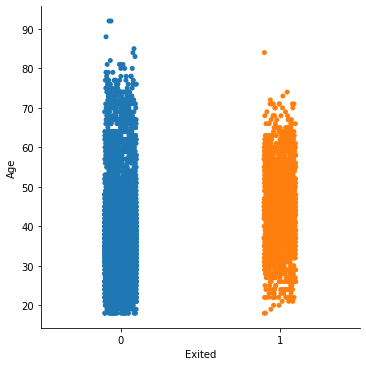

In [32]:
sns.catplot("Exited", "Age", data = data_1)

C:\Users\acer_\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

93.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\acer_\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\acer_\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\acer_\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

79.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\acer_\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

90.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\acer_\Anaconda3\lib\site-packag

<AxesSubplot:xlabel='IsActiveMember', ylabel='Age'>

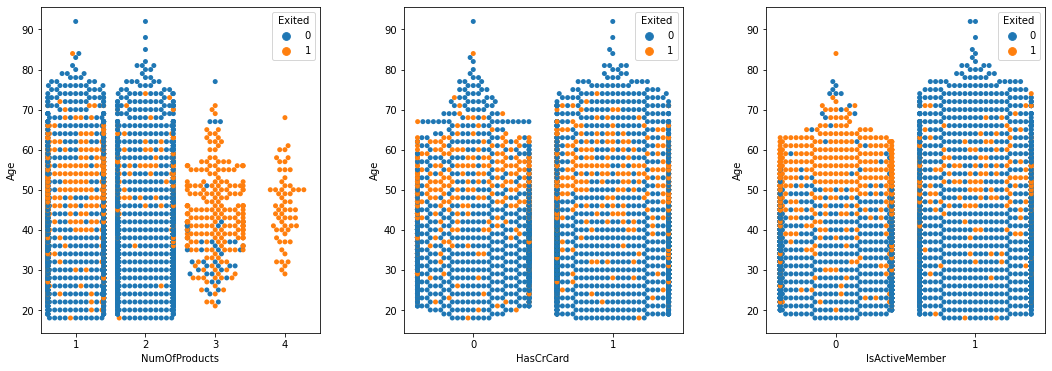

In [33]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.swarmplot(x = "NumOfProducts", y = "Age", hue="Exited", data = data_1, ax= ax[0])
sns.swarmplot(x = "HasCrCard", y = "Age", data = data_1, hue="Exited", ax = ax[1])
sns.swarmplot(x = "IsActiveMember", y = "Age", hue="Exited", data = data_1, ax = ax[2])

<AxesSubplot:xlabel='CreditScore', ylabel='Balance'>

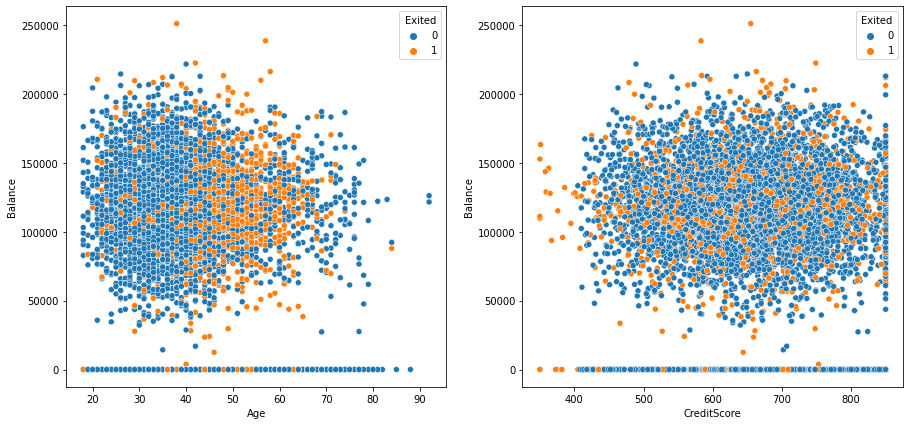

In [34]:
_, ax =  plt.subplots(1, 2, figsize = (15, 7))
cmap = sns.cubehelix_palette(light = 1, as_cmap = True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = data_1, ax = ax[0])
sns.scatterplot(x = "CreditScore", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = data_1, ax = ax[1])

<AxesSubplot:>

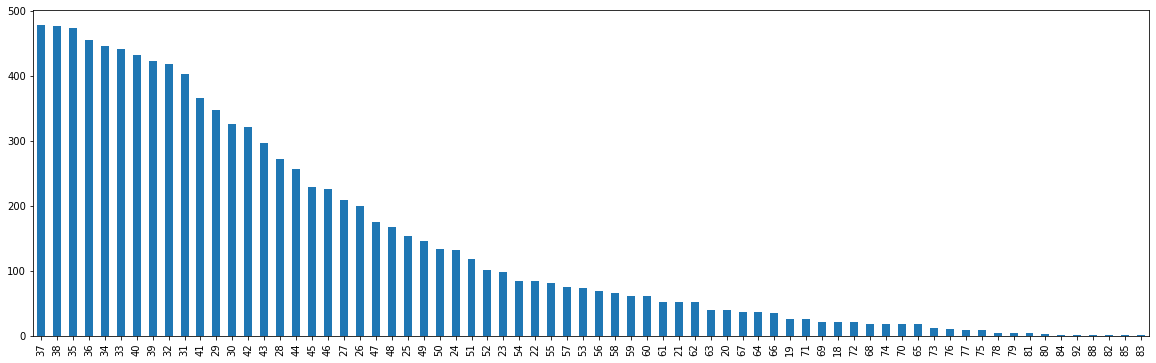

In [35]:
data_1["Age"].value_counts().plot.bar(figsize=(20,6))

In [36]:
df_plot = data_1.groupby('CreditScore').Exited.mean().reset_index()
plot_data = [
    go.Scatter(
        x=df_plot['CreditScore'],
        y=df_plot['Exited'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           ),
    )]
plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Credit score"},
        title='Credit Score based Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
py.iplot(fig)

df_plot = data_1.groupby('Tenure').Exited.mean().reset_index()
plot_data = [
    go.Scatter(
        x=df_plot['Tenure'],
        y=df_plot['Exited'],
        mode='markers',
        name='Low',
        marker= dict(size= 6,
            line= dict(width=1),
            color= 'red',
            opacity= 0.8
           ),
    )]
plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Tenure"},
        title='Tenure based Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
py.iplot(fig)

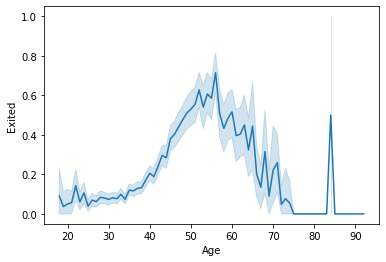

In [37]:
sns.lineplot(x = "Age", y = "Exited", data = data_1);

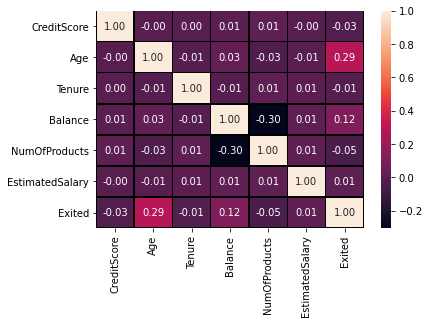

In [38]:
list_corr = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary","Exited"]
sns.heatmap(data_1[list_corr].corr(), annot = True, linecolor = "black", lw = 0.5, fmt= '.2f');

C:\Users\acer_\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Density')

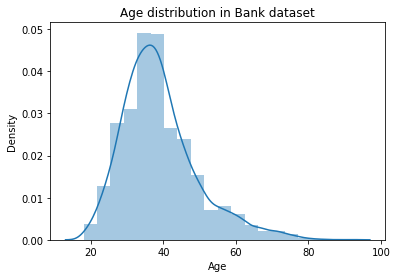

In [39]:
sns.distplot(data_1.Age,bins=20 ) 
plt.title('Age distribution in Bank dataset')
plt.xlabel('Age')
plt.ylabel('Density')

C:\Users\acer_\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\acer_\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

C:\Users\acer_\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\acer_\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor r

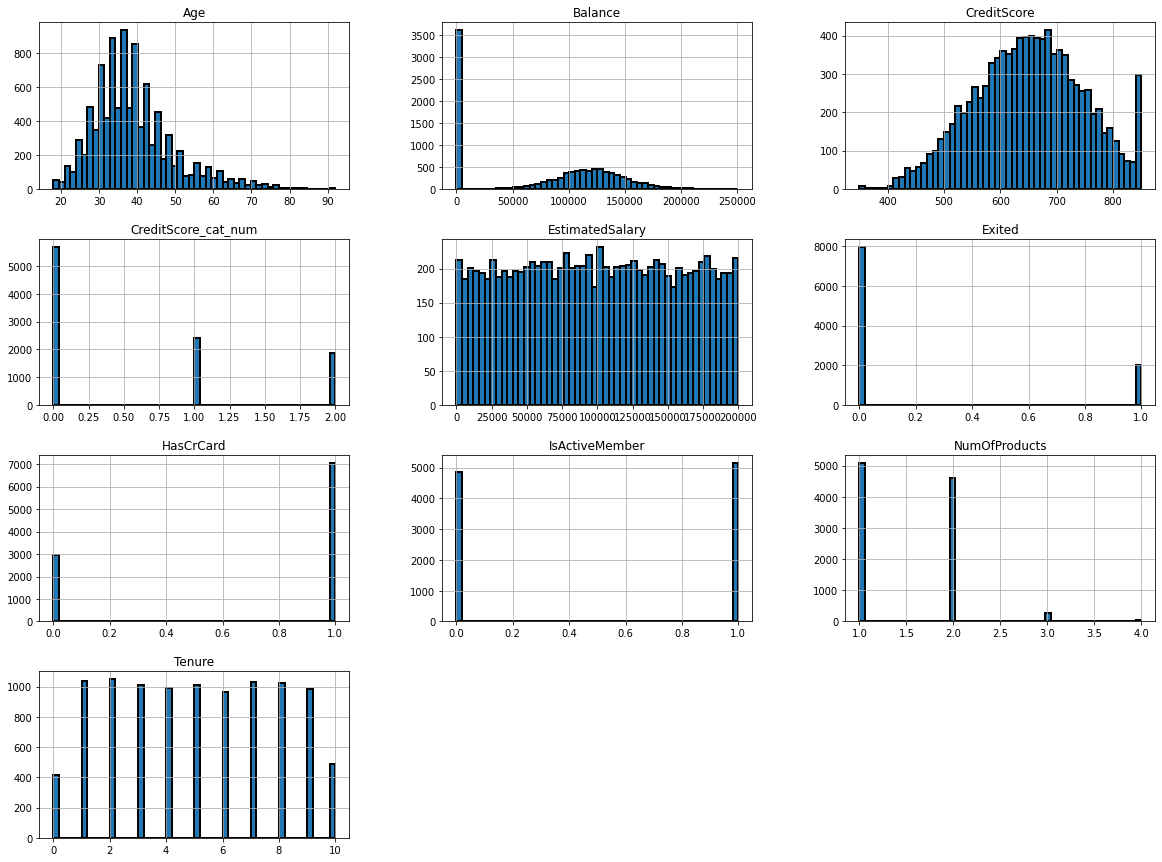

In [40]:
data_1.hist(bins=50, figsize=(20,15), edgecolor='black', linewidth=2)
plt.show()